# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.__version__ # pandas version 

'1.0.5'

## Part 1: Leaf Dataset

In [4]:
# read in dataset 
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [6]:
# find total amount of missing value in eccentricity column
leaf_data["eccentricity"].isnull().sum()

5

Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [7]:
# find mean of eccentricity column 
mean = leaf_data["eccentricity"].mean()
print("mean =", mean)

# fill missing values with the mean
leaf_data["eccentricity"].fillna(mean, inplace = True) 
leaf_data.head()

mean = 0.5675259574468084


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [9]:
# find mean and st dev of eccentricity column 
mean = leaf_data["eccentricity"].mean()
std = leaf_data["eccentricity"].std() 
print(mean, std)

# create new column with standardized eccentricity
leaf_data["standardized eccentricity"] = ((leaf_data["eccentricity"].values - mean) / std) 
leaf_data.head()

0.5675259574468083 0.24247704702094658


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,standardized eccentricity
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,4.578673e-16
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.763441e+00
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.545119e+00
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-1.872588e-01
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-9.691060e-01


Q4. Create a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

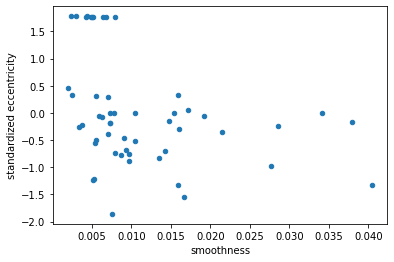

In [11]:
# create scatter plot 
leaf_data.plot.scatter(x = "smoothness", y = "standardized eccentricity");

Q5. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

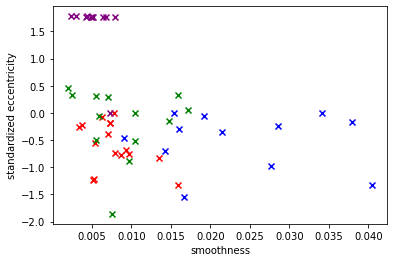

In [12]:
# separate classes 
one = leaf_data[leaf_data["class"] == 1] 
two = leaf_data[leaf_data["class"] == 2] 
three = leaf_data[leaf_data["class"] == 3] 
four = leaf_data[leaf_data["class"] == 4] 

# plot data
plt.scatter(one["smoothness"], one["standardized eccentricity"], c = "red", marker = "x")
plt.scatter(two["smoothness"], two["standardized eccentricity"], c = "green", marker = "x")
plt.scatter(three["smoothness"], three["standardized eccentricity"], c = "blue", marker = "x")
plt.scatter(four["smoothness"], four["standardized eccentricity"], c = "purple", marker = "x")

# name axes 
plt.xlabel("smoothness")
plt.ylabel("standardized eccentricity")
plt.show()

# from this plot, we can infer that that as red smoothness increases, the standardized eccentricity decreases
# as for the purple, blue, and green data points, the standardized eccentricity does not seem to change much based 
# off of smoothness

Q6. Calculate the correlation coefficient between the standardized `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [13]:
# calculate correlation value  
correlation = leaf_data["eccentricity"].corr(leaf_data["smoothness"])
print(correlation)

# the correlation between eccentricity and smoothness tells us that there is a small negative correlation that is 
# most likely not significant enough for the two to be related 

-0.3544184220754999


Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

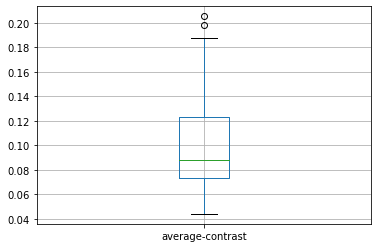

In [14]:
# create boxplot 
leaf_data.boxplot(column = "average-contrast");

## Part 2: Adult Census Dataset

Read in the data. 

In [15]:
# read in dataset 
adult_data = pd.read_csv("adult.csv", skipinitialspace = True)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# display data types 
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

education
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
Elem-school      1147
HS-grad         10501
High-school      3055
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64


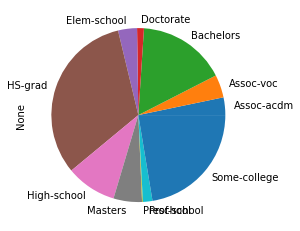

In [20]:
# group by education 
groups = adult_data.groupby("education")
print(groups.size())

# plot 
groups.size().plot.pie();

Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [23]:
# group by marital status 
marital = adult_data.groupby("marital-status").describe()

# print mean, 50%, and std per marital status 
hours_grouped = marital["hours-per-week"]
hours_grouped.loc[:,["mean", "50%", "std"]]

# the married-civ-spouse has the maximum average work hours per week
# while the married-AF-spouse has the most variablity due to the highest standard deviation 

,mean,50%,std
marital-status,,,
Divorced,41.246680,40.0,10.676632
Married-AF-spouse,41.130435,40.0,19.440596
Married-civ-spouse,43.284856,40.0,11.905047
Married-spouse-absent,39.669856,40.0,11.767374
Never-married,36.939998,40.0,12.432542
Separated,39.301463,40.0,10.377534
Widowed,32.979859,40.0,14.058690


In [25]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [26]:
# create deep copy 
adult_data_copy = adult_data.copy()

# add new column 
adult_data_copy["continent"] = adult_data_copy["native-country"].map(continent_dict)
adult_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

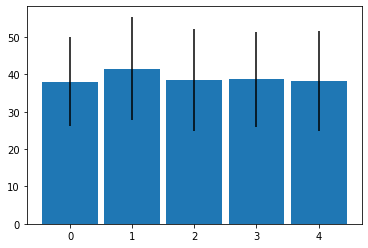

In [27]:
# group by continent / isolate age column 
continent_group = adult_data_copy.groupby("continent").describe()
continent_group_age = continent_group["age"]

# find mean and std of continent age
continent_data = continent_group_age.loc[:,["mean", "std"]]
continent_data

mean_lst = []
std_lst = []
width = 0.9
continents = ["Asia", "Europe", "North-America", "Other", "South-America"]

# gather mean and std 
for row in continent_data["mean"]: 
    mean_lst.append(row)
    
for row in continent_data["std"]: 
    std_lst.append(row)

# plot
loc = np.arange(len(mean_lst))
bar = plt.bar(loc, mean_lst, width, yerr = std_lst)
plt.show()

Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [29]:
'''Explain why here (as a comment):
    In order to reduce dimensionality in this subset, I would eliminate the fnlwgt, education-num, relationship,
    capital gain, capital loss, and class. Not only did we not use any of these attributes, but they are also 
    attributes that we can infer from other data points or the attributes were simply not used in the data analysis. 
'''

'Explain why here (as a comment):\n    In order to reduce dimensionality in this subset, I would eliminate the fnlwgt, education-num, relationship,\n    capital gain, capital loss, and class. Not only did we not use any of these attributes, but they are also \n    attributes that we can infer from other data points or the attributes were simply not used in the data analysis. \n'